# Import

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

url = "./data.csv"
sep = ","
random_state = 42
target = "language"

print("Setup ok")

Setup ok


# 1. Load data ...

In [2]:
# 1. Load data
df = pd.read_csv(url)
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [3]:
#size
rows, cols = df.shape
print(f"there are {rows} rows and {cols} columns")

there are 329 rows and 13 columns


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X5'}>,
        <Axes: title={'center': 'X6'}>],
       [<Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>,
        <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: title={'center': 'X12'}>]], dtype=object)

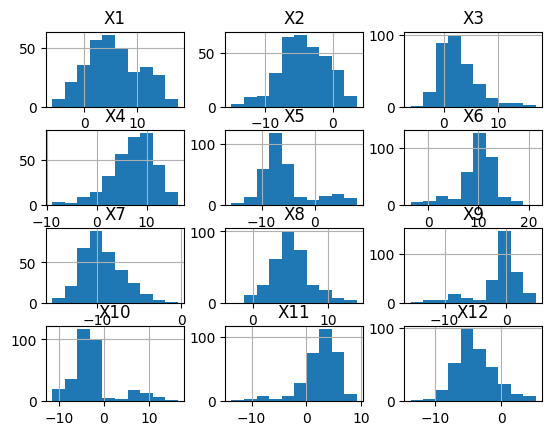

In [4]:
# histograms
df.hist()

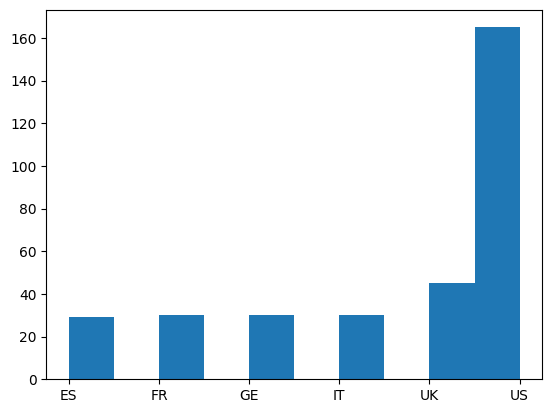

In [5]:
# Frequencies of target lable
plt.hist(df[target])
plt.show()

# 2. Comments

there are unbalanced distribution on X5 X6 X9 X10 X11, in the target histogram we can see US is dominant

# 3. Drop NaN

In [6]:
df.dropna()
rows, cols = df.shape
print(f"there are {rows} rows and {cols} columns after cleaning")

there are 329 rows and 13 columns after cleaning


# 4. Model 1

In [7]:
#setup
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

In [10]:
#decision tree
clf = DecisionTreeClassifier(random_state=random_state)

param_dt = {
    'criterion':['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_dt,
    cv=5,
    scoring='recall_macro'
)

grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy']}"
,scoring,'recall_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


# 5. classification report

In [14]:
best = grid_search.best_estimator_

y_pred = best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          ES       0.86      1.00      0.92         6
          FR       0.67      0.67      0.67         6
          GE       0.56      0.83      0.67         6
          IT       0.80      0.67      0.73         6
          UK       0.78      0.78      0.78         9
          US       0.87      0.79      0.83        33

    accuracy                           0.79        66
   macro avg       0.75      0.79      0.76        66
weighted avg       0.80      0.79      0.79        66



# 6. Confusion Matrix

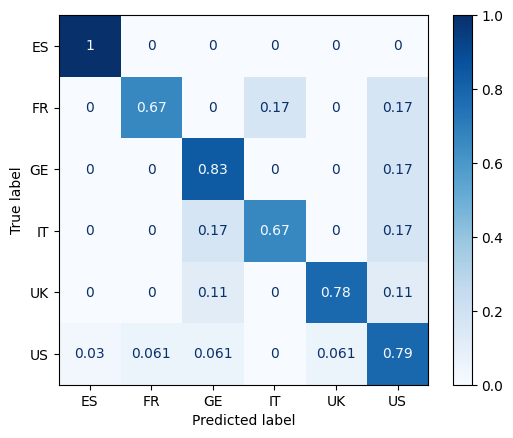

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', normalize='true')

# 7. Model 2

In [20]:
#random forest
rf = RandomForestClassifier(random_state=random_state)

param_rf = {
    'class_weight':[None, 'balanced']
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_rf,
    cv=5,
    scoring='recall_macro',
)

grid_rf.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'class_weight': [None, 'balanced']}"
,scoring,'recall_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


# 8. Classification Report

In [23]:
best_rf = grid_rf.best_estimator_

y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          ES       0.86      1.00      0.92         6
          FR       1.00      0.50      0.67         6
          GE       1.00      1.00      1.00         6
          IT       1.00      0.67      0.80         6
          UK       1.00      0.56      0.71         9
          US       0.78      0.97      0.86        33

    accuracy                           0.85        66
   macro avg       0.94      0.78      0.83        66
weighted avg       0.88      0.85      0.84        66



# 9. Confusion Matrix

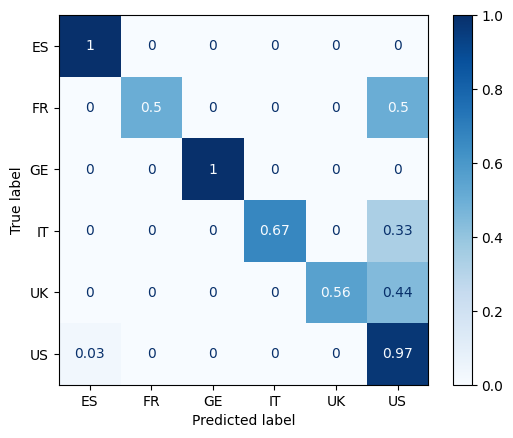

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', normalize='true')